In [9]:
library("broom")
library("ggplot2")
# library("vcd")
# library(janitor) 
library(dplyr)
# options(warn=0)
library(sandwich)
library(forecast)
library(tsoutliers)
library(lmtest)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



ERROR: Error in library(tsoutliers): there is no package called ‘tsoutliers’


In [50]:
df1 <- read.csv(file="cian_curdata.csv", header=TRUE, sep=",", stringsAsFactors = TRUE) 

In [51]:
# df2  <-  df1  %>%  distinct(Rooms, Price, Totsp, flat_lat, flat_lon,  NFloor,  .keep_all= TRUE)  
# write.csv(df2, 'cian_curdata.csv')

In [52]:
# df1


In [53]:
df1['RoomspMean'] = df1['Livesp']/df1['Rooms']

In [54]:
df1['KitspShare'] = df1['Kitsp']/df1['Totsp']

In [55]:
df1['ClosestNeighbour'] = df1['X']
df1['ClosestNeighbourKm'] = 0
# df1['MetrdistFilled'] = df1['Metrdist']

In [56]:
dfp1 = df1[df1['DistrictName']=='', ]
dfp2 = df1[df1['DistrictName']!='', ]

In [57]:
dfp2[dfp2['X']==33721,]

,X.2,X.1,X,Rooms,Price,Totsp,Livesp,Kitsp,Dist,Metrdist,⋯,AllRoomsArea,Url,LogPrice,RoomspMean,KitspShare,ClosestNeighbour,ClosestNeighbourKm,AgeDiff,AvgFloor,FloorDiff
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
3601,4645,4645,33721,2,7800000,37,21.8,7,5.413835,15,⋯,"10,6+11,2",https://www.cian.ru/sale/flat/228412453/,15.86963,10.9,0.1891892,33721,0,-4,15,-6


In [49]:
# for (i in 1:dim(dfp1)[1]){
#     dfp1[i, 'ClosestNeighbourKm'] = min((dfp2[['FlatLat']] - dfp1[i, 'FlatLat'])**2+(dfp2[['FlatLon']] - dfp1[i, 'FlatLon'])**2)*111
#     a = which.min((dfp2[['FlatLat']] - dfp1[i, 'FlatLat'])**2+(dfp2[['FlatLon']] - dfp1[i, 'FlatLon'])**2)
#     dfp1[i, 'ClosestNeighbour'] = dfp2[a,'X']
# }

# dfp3 = dfp1

# # for (i in 1:dim(dfp1)[1]){
# #       dfp3[i,'DistrictName'] = dfp2[dfp2['X']==dfp1[i, 'ClosestNeighbour'], 'DistrictName']
# #       dfp3[i,'AvgAge'] = dfp2[dfp2['X']==dfp1[i, 'ClosestNeighbour'], 'AvgAge']
# #       dfp3[i,'AvgSqmPr'] = dfp2[dfp2['X']==dfp1[i, 'ClosestNeighbour'], 'AvgSqmPr']
# #       dfp3[i,'AvgRentPr'] = dfp2[dfp2['X']==dfp1[i, 'ClosestNeighbour'], 'AvgRentPr']  
# # #       dfp3[i,'MetrdistFilled'] = dfp2[dfp2['X']==dfp1[i, 'ClosestNeighbour'], 'MetrdistFilled'] 
# # #       dfp3[i,'Walk'] = dfp2[dfp2['X']==dfp1[i, 'ClosestNeighbour'], 'Walk'] 
# # #     dfp1[i, 'ClosestNeighbourKm'] = min((dfp2[['FlatLat']] - dfp1[i, 'FlatLat'])**2+(dfp2[['FlatLon']] - dfp1[i, 'FlatLon'])**2)*111
# # #     a = which.min((dfp2[['FlatLat']] - dfp1[i, 'FlatLat'])**2+(dfp2[['FlatLon']] - dfp1[i, 'FlatLon'])**2)
# # #     dfp1[i, 'ClosestNeighbour'] = dfp2[a,'X']
# # }

ERROR: Error in x[[jj]][iseq] <- vjj: replacement has length zero


In [59]:
df2 = rbind(dfp2)

In [60]:
distr = as.character(unique(df2[['DistrictName']]))

In [61]:
df2['AgeDiff'] = df2['HouseAge'] - df2['AvgAge']

In [62]:
df2['AvgFloor'] = 0

In [63]:
for (i in 1:length(distr)){
    dfch = df2[df2['DistrictName']== distr[i],'Floors']
    df2[df2['DistrictName']== distr[i],'AvgFloor'] = mean(dfch)
}

In [64]:
df2['AvgFloor'] = round(df2['AvgFloor'])

In [65]:
df2['FloorDiff'] = df2['Floors'] - df2['AvgFloor']

In [66]:
# write.csv(df2, 'cian_curdata.csv')

In [67]:
# colSums(is.na(df2))

In [68]:
# dfp3[is.na(dfp3['Metrdist']),]

In [69]:
# dfp1[dfp1['ClosestNeighbourKm']>0.01,]

In [70]:
# df1[df1['DistrictName']=='',30:58]

In [71]:

which.min((dfp2[['FlatLat']] - 55.779874)**2+(dfp2[['FlatLon']] - 37.573995)**2)

[1] 6872

In [72]:
df1=df2

In [73]:
mosaic( ~ Rooms +  AOName  , data = df1, shade = TRUE)

ERROR: Error in mosaic(~Rooms + AOName, data = df1, shade = TRUE): could not find function "mosaic"


In [74]:
mosaic( ~ Rooms +  AOName  + Walk , data = df1, shade = TRUE)

ERROR: Error in mosaic(~Rooms + AOName + Walk, data = df1, shade = TRUE): could not find function "mosaic"


In [75]:
mosaic( ~ Rooms +  AOName  + Brick , data = df1, shade = TRUE)

ERROR: Error in mosaic(~Rooms + AOName + Brick, data = df1, shade = TRUE): could not find function "mosaic"


In [76]:
# df2 = df1[!is.na(df1$house_material),]
df2 = df1[df1$HouseMaterial!='',]
mosaic( ~ Rooms   + HouseMaterial  +  AOName, data = df2, shade = TRUE)
# na.omit(df1, 'house_material')

ERROR: Error in mosaic(~Rooms + HouseMaterial + AOName, data = df2, shade = TRUE): could not find function "mosaic"


In [77]:
df3 = df1[df1$RemontType!='',]
mosaic( ~ Rooms   + RemontType  +  AOName, data = df3, shade = TRUE)

ERROR: Error in mosaic(~Rooms + RemontType + AOName, data = df3, shade = TRUE): could not find function "mosaic"


In [78]:
df4 = df1[df1$Demolish!='',]
mosaic( ~ Rooms   + Demolish  +  AOName, data = df4, shade = TRUE)

ERROR: Error in mosaic(~Rooms + Demolish + AOName, data = df4, shade = TRUE): could not find function "mosaic"


In [79]:
df5 = df1[df1$PegToCur!='',]
mosaic( ~ Rooms   + PegToCur  +  AOName, data = df5, shade = TRUE)

ERROR: Error in mosaic(~Rooms + PegToCur + AOName, data = df5, shade = TRUE): could not find function "mosaic"


In [80]:
colnames(df1)

[1] "X.2"                "X.1"                "X"                 
 [4] "Rooms"              "Price"              "Totsp"             
 [7] "Livesp"             "Kitsp"              "Dist"              
[10] "Metrdist"           "Walk"               "Brick"             
[13] "Tel"                "Bal"                "Floor"             
[16] "New"                "Floors"             "NFloor"            
[19] "floor1"             "floor2"             "N"                 
[22] "NE"                 "E"                  "SE"                
[25] "S"                  "SW"                 "W"                 
[28] "NW"                 "Centr"              "Zelen"             
[31] "PegToCur"           "FlatLat"            "FlatLon"           
[34] "MetroColor"         "MetroName"          "AOName"            
[37] "DistrictName"       "AvgAge"             "AvgSqmPr"          
[40] "AvgRentPr"          "Height"             "Demolish"          
[43] "HouseAge"           "HouseMaterial"      "BalNum"            
[46] "LoggiasNum"         "WCCombinedNum"      "WCSeparateNum"     
[49] "RemontType"         "WindowView"         "TotFlatNum"        
[52] "EntrancesNum"       "ParkingType"        "PasLiftNum"        
[55] "ImagesNum"          "SimilarNum"         "MortgageAllowed"   
[58] "AllRoomsArea"       "Url"                "LogPrice"          
[61] "RoomspMean"         "KitspShare"         "ClosestNeighbour"  
[64] "ClosestNeighbourKm" "AgeDiff"            "AvgFloor"          
[67] "FloorDiff"

In [81]:
df1['Totsp2']  = df1['Totsp']^2  
df1['Height2']  = df1['Height']^2  
df1['HouseAge2']  = df1['HouseAge']^2  
df1['NFloor2']  = df1['NFloor']^2  
df1['AgeDiff2']  = df1['AgeDiff']^2  
df1['RoomspMean2']  = df1['RoomspMean']^2  

In [82]:
# df1['Bal'] == 

In [83]:
lm1 = lm(LogPrice~Rooms+Totsp+Totsp2+Dist+Metrdist+Walk+Brick+Floors+NFloor+NFloor2+
         floor1+floor2+ N + S+Height+Height2 + PegToCur+Demolish+ HouseAge+ HouseAge2+TotFlatNum+
         RoomspMean + RoomspMean2+ KitspShare + AgeDiff + AgeDiff2 + FloorDiff, data = df1)
summary(lm1)


Call:
lm(formula = LogPrice ~ Rooms + Totsp + Totsp2 + Dist + Metrdist + 
    Walk + Brick + Floors + NFloor + NFloor2 + floor1 + floor2 + 
    N + S + Height + Height2 + PegToCur + Demolish + HouseAge + 
    HouseAge2 + TotFlatNum + RoomspMean + RoomspMean2 + KitspShare + 
    AgeDiff + AgeDiff2 + FloorDiff, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73983 -0.10951 -0.00995  0.09851  1.18416 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.616e+01  4.294e-01  37.630  < 2e-16 ***
Rooms       -5.992e-02  1.685e-02  -3.557 0.000381 ***
Totsp        2.568e-02  1.251e-03  20.524  < 2e-16 ***
Totsp2      -6.095e-05  5.624e-06 -10.838  < 2e-16 ***
Dist        -2.823e-02  1.493e-03 -18.905  < 2e-16 ***
Metrdist    -4.842e-03  9.075e-04  -5.336 1.02e-07 ***
Walk         7.623e-02  1.376e-02   5.540 3.29e-08 ***
Brick        4.011e-02  1.136e-02   3.530 0.000421 ***
Floors       1.305e-03  1.429e-03   0.913 0.361096    
NFloor 

In [87]:
# LogPrice~Rooms+Totsp+Totsp2+Dist+Metrdist+Walk+Brick+Floors+NFloor+NFloor2+
#          floor1+floor2+ N + S+Height+Height2 + PegToCur+Demolish+ HouseAge+ HouseAge2+TotFlatNum+
#          RoomspMean + RoomspMean2+ KitspShare + AgeDiff + AgeDiff2 + FloorDiff, data = df1

In [92]:
lm1 = lm(LogPrice~log(Dist)+Brick+Totsp+HouseAge, data = df1)
summary(lm1)


Call:
lm(formula = LogPrice ~ log(Dist) + Brick + Totsp + HouseAge, 
    data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.30669 -0.14870 -0.01638  0.11912  1.59136 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.5111476  0.0177128 932.160  < 2e-16 ***
log(Dist)   -0.4609611  0.0047232 -97.594  < 2e-16 ***
Brick        0.0563552  0.0068825   8.188 3.06e-16 ***
Totsp        0.0160821  0.0001155 139.281  < 2e-16 ***
HouseAge    -0.0031191  0.0001027 -30.379  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2409 on 8042 degrees of freedom
  (714 observations deleted due to missingness)
Multiple R-squared:  0.882,	Adjusted R-squared:  0.882 
F-statistic: 1.503e+04 on 4 and 8042 DF,  p-value: < 2.2e-16


In [59]:
coeftest(lm1, vcov = vcovCL(lm1, cluster=df1$DistrictName, type="HC1"))


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.6159e+01  1.0160e+00 15.9043 < 2.2e-16 ***
Rooms       -5.9920e-02  2.7567e-02 -2.1736 0.0298085 *  
Totsp        2.5684e-02  1.7174e-03 14.9555 < 2.2e-16 ***
Totsp2      -6.0953e-05  9.6363e-06 -6.3254 2.890e-10 ***
Dist        -2.8230e-02  5.2659e-03 -5.3609 8.890e-08 ***
Metrdist    -4.8425e-03  1.2011e-03 -4.0318 5.669e-05 ***
Walk         7.6227e-02  2.0954e-02  3.6379 0.0002794 ***
Brick        4.0110e-02  1.3380e-02  2.9978 0.0027410 ** 
Floors       1.3051e-03  4.2507e-03  0.3070 0.7588459    
NFloor       4.4105e-03  2.6568e-03  1.6601 0.0969974 .  
NFloor2     -1.1635e-04  1.1537e-04 -1.0085 0.3132875    
floor1      -9.2713e-02  1.5270e-02 -6.0716 1.420e-09 ***
floor2      -4.9860e-02  1.6053e-02 -3.1059 0.0019140 ** 
N           -2.3561e-01  6.1287e-02 -3.8444 0.0001233 ***
S           -2.1481e-01  7.1129e-02 -3.0200 0.0025484 ** 
Height      -4.6855e-01  6.1357e-01 -0.7637 0.

In [6]:
df2 = df1[df1$AOName == 'САО',]
df2 = df2[order(df2$Dist), ]
lm2 = lm(LogPrice~Rooms+Totsp+Totsp2+Dist+Metrdist+Walk+Brick+Floors+NFloor+NFloor2+
         floor1+floor2+Height+Height2 +PegToCur+Demolish+ HouseAge+HouseAge2+ TotFlatNum+
         RoomspMean + RoomspMean2+ KitspShare + AgeDiff + AgeDiff2 + FloorDiff, data = df2)
# , weights = Dist
summary(lm2)


Call:
lm(formula = LogPrice ~ Rooms + Totsp + Totsp2 + Dist + Metrdist + 
    Walk + Brick + Floors + NFloor + NFloor2 + floor1 + floor2 + 
    Height + Height2 + PegToCur + Demolish + HouseAge + HouseAge2 + 
    TotFlatNum + RoomspMean + RoomspMean2 + KitspShare + AgeDiff + 
    AgeDiff2 + FloorDiff, data = df2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37909 -0.09219 -0.01202  0.08415  0.79862 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.462e+01  8.209e-01  17.816  < 2e-16 ***
Rooms       -4.570e-02  2.276e-02  -2.008 0.044972 *  
Totsp        2.396e-02  1.848e-03  12.968  < 2e-16 ***
Totsp2      -5.934e-05  8.989e-06  -6.601 6.84e-11 ***
Dist        -3.130e-02  2.113e-03 -14.814  < 2e-16 ***
Metrdist    -2.402e-03  1.158e-03  -2.073 0.038416 *  
Walk         7.643e-02  1.578e-02   4.843 1.50e-06 ***
Brick        7.768e-02  1.296e-02   5.996 2.90e-09 ***
Floors       1.282e-02  2.172e-03   5.900 5.10e-09 ***
NFloor       7.

In [35]:
coeftest(lm2, vcov = vcovCL(lm2, cluster=df2$DistrictName, type="HC1"))


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.4625e+01  1.1343e+00 12.8926 < 2.2e-16 ***
Rooms       -4.5696e-02  1.0796e-02 -4.2328 2.538e-05 ***
Totsp        2.3960e-02  1.4291e-03 16.7657 < 2.2e-16 ***
Totsp2      -5.9342e-05  6.3456e-06 -9.3516 < 2.2e-16 ***
Dist        -3.1298e-02  4.8669e-03 -6.4308 2.030e-10 ***
Metrdist    -2.4017e-03  1.4832e-03 -1.6193  0.105724    
Walk         7.6425e-02  2.5552e-02  2.9910  0.002855 ** 
Brick        7.7681e-02  1.6486e-02  4.7120 2.829e-06 ***
Floors       1.2816e-02  3.7586e-03  3.4098  0.000678 ***
NFloor       7.1118e-03  2.4786e-03  2.8692  0.004208 ** 
NFloor2     -2.4653e-04  8.8146e-05 -2.7968  0.005268 ** 
floor1      -7.8676e-02  1.7912e-02 -4.3924 1.251e-05 ***
floor2      -1.2492e-02  2.3483e-02 -0.5319  0.594898    
Height       4.7468e-01  7.8372e-01  0.6057  0.544882    
Height2     -5.9400e-02  1.3130e-01 -0.4524  0.651086    
PegToCur     1.7084e-01  1.2627e-01  1.3530  0

In [7]:
df3 = df1[df1$AOName == 'ЮАО',]
df3 = df3[order(df3$Dist), ]
lm3 = lm(LogPrice~Rooms+Totsp+Totsp2+Dist+Metrdist+Walk+Brick+Floors+NFloor+NFloor2+
         floor1+floor2+Height+Height2+ PegToCur+Demolish+ HouseAge+ HouseAge2+TotFlatNum+
         RoomspMean+RoomspMean2 + KitspShare + AgeDiff  + AgeDiff2+ FloorDiff, data = df3)
summary(lm3)


Call:
lm(formula = LogPrice ~ Rooms + Totsp + Totsp2 + Dist + Metrdist + 
    Walk + Brick + Floors + NFloor + NFloor2 + floor1 + floor2 + 
    Height + Height2 + PegToCur + Demolish + HouseAge + HouseAge2 + 
    TotFlatNum + RoomspMean + RoomspMean2 + KitspShare + AgeDiff + 
    AgeDiff2 + FloorDiff, data = df3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33779 -0.07338 -0.00939  0.06434  0.60910 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.720e+01  7.103e-01  24.208  < 2e-16 ***
Rooms       -7.932e-03  1.958e-02  -0.405 0.685512    
Totsp        2.389e-02  1.546e-03  15.455  < 2e-16 ***
Totsp2      -6.953e-05  7.371e-06  -9.433  < 2e-16 ***
Dist        -2.576e-02  1.389e-03 -18.541  < 2e-16 ***
Metrdist    -5.156e-03  8.097e-04  -6.368 2.76e-10 ***
Walk         1.063e-01  1.174e-02   9.051  < 2e-16 ***
Brick        1.322e-02  1.153e-02   1.146 0.251892    
Floors       1.613e-03  2.200e-03   0.733 0.463522    
NFloor       7.

In [ ]:
# coeftest(lm3, vcov = vcovCL(lm3, cluster=df3$DistrictName, type="HC1"))

In [8]:
df4 = df1[df1$AOName == 'ЦАО',]
df4 = df4[order(df4$Dist), ]
lm4 = lm(LogPrice~Rooms+Totsp+Totsp2+Dist+Metrdist+Walk+Brick+Floors+NFloor+NFloor2+
         floor1+floor2+ Height+ Height2+PegToCur+Demolish+ HouseAge + HouseAge2+ TotFlatNum+
         RoomspMean+RoomspMean2 + KitspShare + AgeDiff + AgeDiff2+ FloorDiff, data = df4)
summary(lm4)


Call:
lm(formula = LogPrice ~ Rooms + Totsp + Totsp2 + Dist + Metrdist + 
    Walk + Brick + Floors + NFloor + NFloor2 + floor1 + floor2 + 
    Height + Height2 + PegToCur + Demolish + HouseAge + HouseAge2 + 
    TotFlatNum + RoomspMean + RoomspMean2 + KitspShare + AgeDiff + 
    AgeDiff2 + FloorDiff, data = df4)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72745 -0.17015 -0.02267  0.14982  1.03248 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.339e+01  8.425e-01  15.898  < 2e-16 ***
Rooms       -5.843e-02  3.332e-02  -1.753  0.07984 .  
Totsp        2.616e-02  2.381e-03  10.988  < 2e-16 ***
Totsp2      -6.132e-05  1.023e-05  -5.995 2.88e-09 ***
Dist        -1.479e-01  8.850e-03 -16.715  < 2e-16 ***
Metrdist     1.782e-03  2.523e-03   0.706  0.48005    
Walk        -1.224e-01  7.682e-02  -1.593  0.11145    
Brick        1.039e-01  3.145e-02   3.303  0.00099 ***
Floors       2.288e-03  2.747e-03   0.833  0.40499    
NFloor       3.

In [76]:
# c4 =
# coeftest(lm4, vcov = vcovCL(lm4, cluster=df4$DistrictName, type="HC1"))

In [83]:
bptest(lm1)
bptest(lm2)
bptest(lm3)
bptest(lm4)


	studentized Breusch-Pagan test

data:  lm1
BP = 588.16, df = 27, p-value < 2.2e-16



	studentized Breusch-Pagan test

data:  lm2
BP = 61.897, df = 25, p-value = 5.698e-05



	studentized Breusch-Pagan test

data:  lm3
BP = 192.08, df = 25, p-value < 2.2e-16



	studentized Breusch-Pagan test

data:  lm4
BP = 125.24, df = 25, p-value = 2.609e-15



	Breusch-Godfrey test for serial correlation of order up to 31

data:  Residuals
LM test = 75.581, df = 31, p-value = 1.365e-05


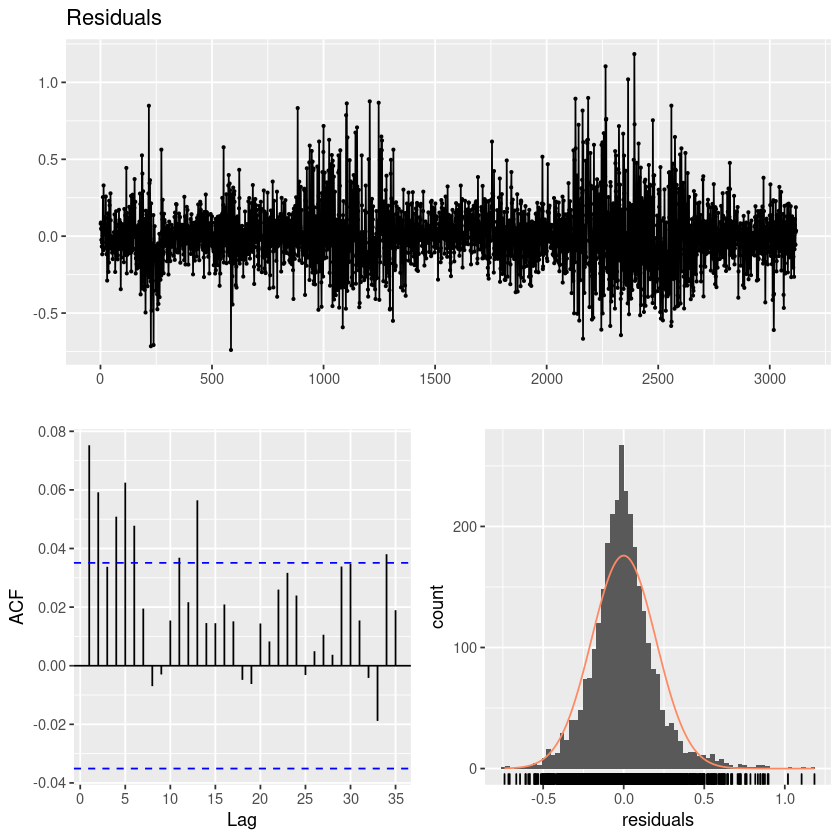


	Breusch-Godfrey test for serial correlation of order up to 29

data:  Residuals
LM test = 75.931, df = 29, p-value = 4.49e-06


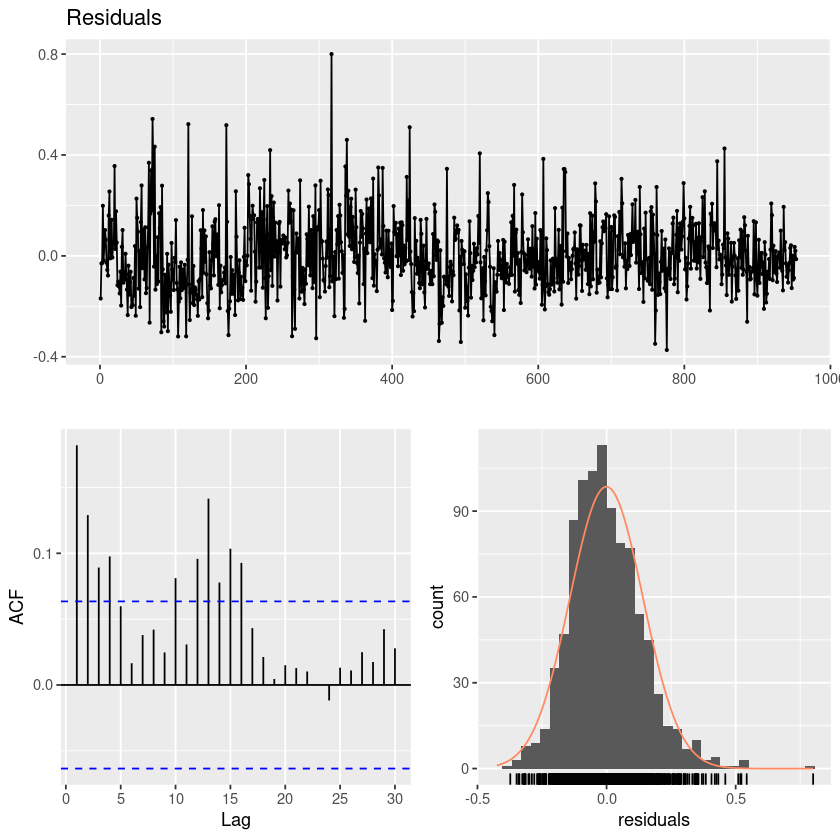


	Breusch-Godfrey test for serial correlation of order up to 29

data:  Residuals
LM test = 83.508, df = 29, p-value = 3.511e-07


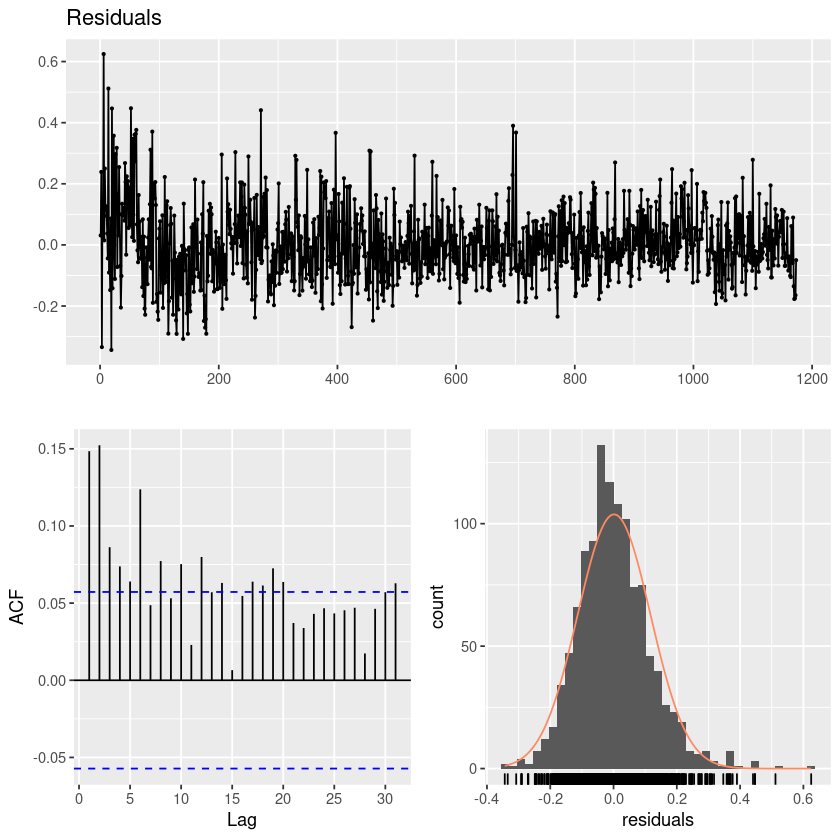


	Breusch-Godfrey test for serial correlation of order up to 29

data:  Residuals
LM test = 123.17, df = 29, p-value = 1.425e-13


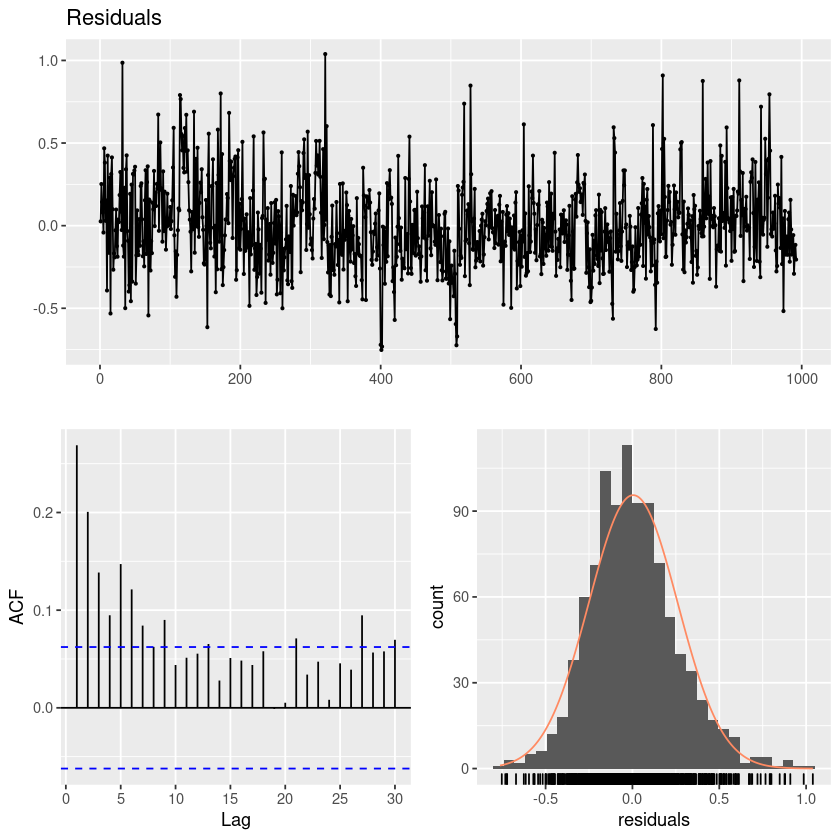

In [79]:
checkresiduals(lm1)
checkresiduals(lm2)
checkresiduals(lm3)
checkresiduals(lm4)

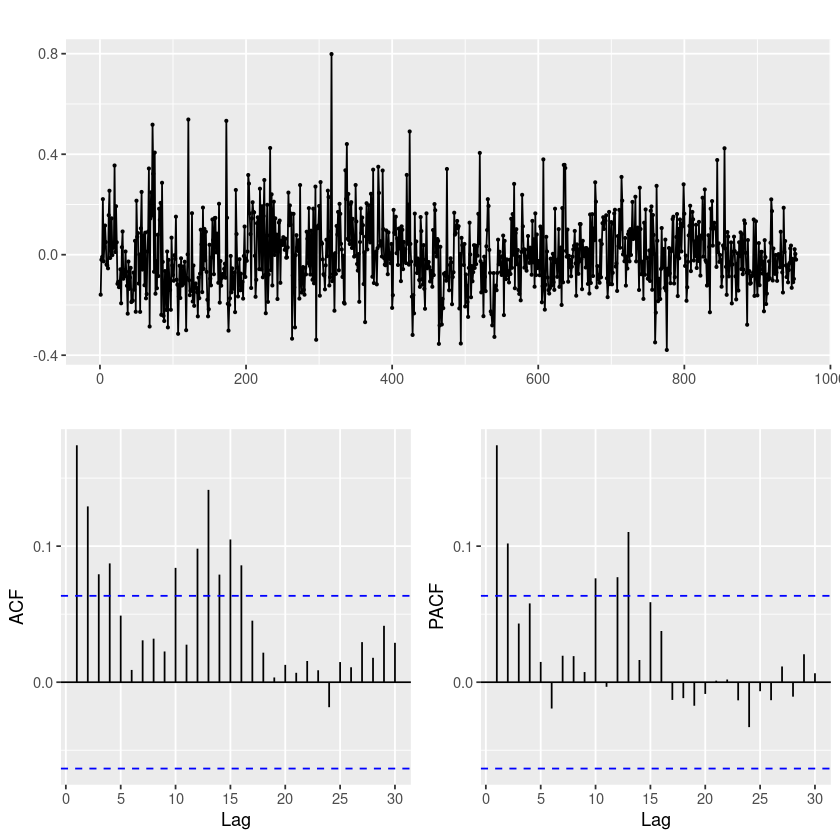

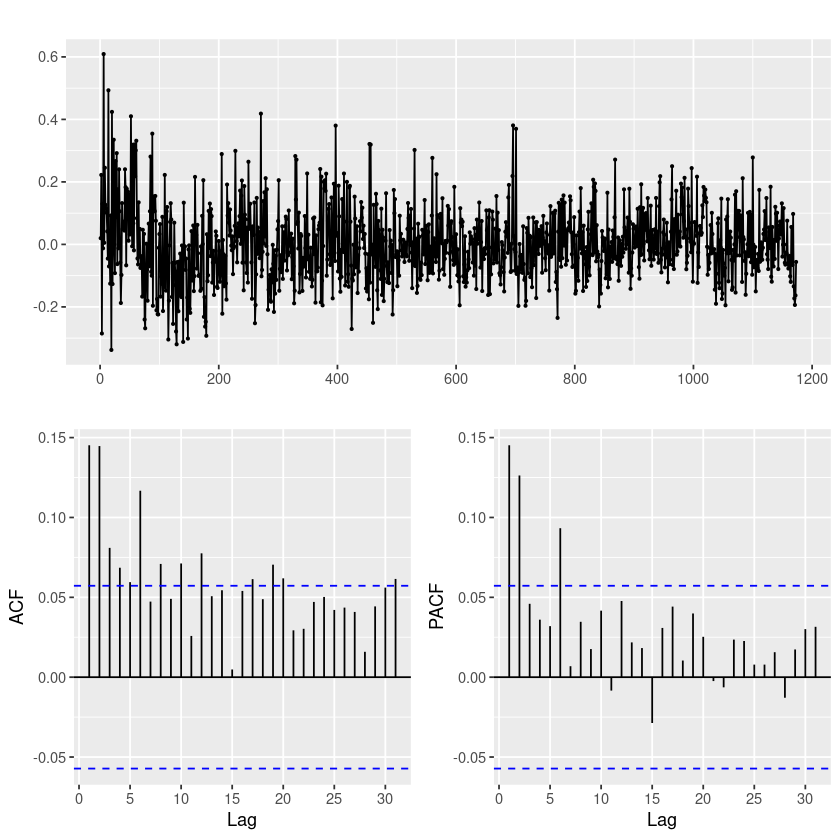

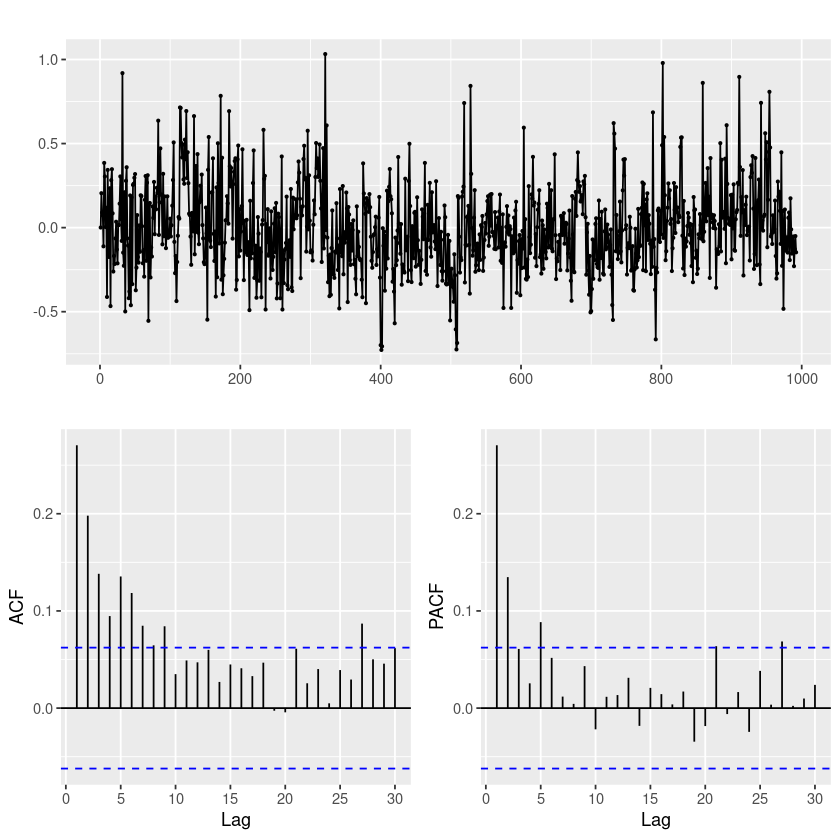

In [69]:
ggtsdisplay(lm2$residuals)
ggtsdisplay(lm3$residuals)
ggtsdisplay(lm4$residuals)

In [53]:
bgtest(lm1, order = 1, order.by = ~Dist, data=data.frame(lm1[[7]][[1]]))
bgtest(lm2, order = 1, order.by = ~Dist, data=data.frame(lm2[[7]][[1]]))
bgtest(lm3, order = 1, order.by = ~Dist, data=data.frame(lm3[[7]][[1]]))
bgtest(lm4, order = 1, order.by = ~Dist, data=data.frame(lm4[[7]][[1]]))


	Breusch-Godfrey test for serial correlation of order up to 1

data:  lm1
LM test = 13.486, df = 1, p-value = 0.0002404



	Breusch-Godfrey test for serial correlation of order up to 1

data:  lm2
LM test = 7.9161, df = 1, p-value = 0.0049



	Breusch-Godfrey test for serial correlation of order up to 1

data:  lm3
LM test = 6.2343, df = 1, p-value = 0.01253



	Breusch-Godfrey test for serial correlation of order up to 1

data:  lm4
LM test = 2.9555, df = 1, p-value = 0.08559


In [57]:
resettest(lm1) 
resettest(lm2) 
resettest(lm3) 
resettest(lm4) 
# , vcov = vcovCL(lm4, cluster=df4$DistrictName, type="HC1"))


	RESET test

data:  lm1
RESET = 111.9, df1 = 2, df2 = 3088, p-value < 2.2e-16



	RESET test

data:  lm2
RESET = 3.9369, df1 = 2, df2 = 925, p-value = 0.01984



	RESET test

data:  lm3
RESET = 25.621, df1 = 2, df2 = 1145, p-value = 1.302e-11



	RESET test

data:  lm4
RESET = 7.2833, df1 = 2, df2 = 964, p-value = 0.0007254


In [55]:
shapiro.test(lm1$residuals)
shapiro.test(lm2$residuals)
shapiro.test(lm3$residuals)
shapiro.test(lm4$residuals)
shapiro.test(rnorm(100, mean = 5, sd = 3))


	Shapiro-Wilk normality test

data:  lm1$residuals
W = 0.962, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  lm2$residuals
W = 0.97835, p-value = 1.059e-10



	Shapiro-Wilk normality test

data:  lm3$residuals
W = 0.98125, p-value = 3.533e-11



	Shapiro-Wilk normality test

data:  lm4$residuals
W = 0.98368, p-value = 4.376e-09



	Shapiro-Wilk normality test

data:  rnorm(100, mean = 5, sd = 3)
W = 0.9853, p-value = 0.3338


,X.Intercept.,Rooms,Totsp,Totsp2,Dist,Metrdist,Walk,Brick,Floors,NFloor,⋯,Demolish,HouseAge,HouseAge2,TotFlatNum,RoomspMean,RoomspMean2,KitspShare,AgeDiff,AgeDiff2,FloorDiff
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1154,-30.87069808,-68.090458936,-1.944517e+03,-1.373950e+05,-323.27822172,-2.683451e+02,-26.562405484,-16.974024968,-4.772163e+02,-2.531851e+02,⋯,-0.7126499032,-1.059225e+03,-5.260001e+04,-8.794391e+03,-5.339616e+02,-9.657014e+03,-5.325567409,3.931560e+02,-1.954497e+04,80.432259533
4476,0.03239318,-22.884261008,-4.839881e+02,-6.480477e+04,14.45459552,-1.016429e+00,-1.020510129,-1.714315788,-4.418924e+00,-3.299738e+00,⋯,-0.1081678376,-3.250781e+01,-3.070330e+03,-8.442858e+02,2.998082e+01,1.078895e+03,1.035150315,-6.081564e+00,-3.211260e+02,-6.540279574
4076,0.03239318,0.034992908,4.754867e+02,7.864355e+04,-26.61552469,-5.929224e+00,1.043002703,6.024522315,1.316892e+02,6.869495e+01,⋯,-0.8013092438,-3.315578e+02,-2.069745e+04,3.290632e+03,8.668867e+01,3.299328e+03,0.385591352,-3.646275e+02,1.266102e+04,107.735064354
4169,0.03239318,0.034992908,5.829121e-02,-1.879352e+04,-6.60649493,-2.479824e+00,0.413388313,2.873369147,3.081852e+01,2.113339e+01,⋯,-0.5120150601,-1.066497e+02,-4.736296e+03,1.422902e+03,8.285671e+00,1.541168e+02,0.004943438,-1.079199e+02,3.611032e+03,20.570131920
265,0.03239318,-0.052403404,2.505862e-03,2.293681e-02,113.37309329,6.752013e+00,-3.987910337,-3.978148068,2.240776e+01,1.361652e+01,⋯,0.0527657442,-2.053496e+02,-1.903782e+04,-1.520904e+03,-6.352300e+00,-3.090796e+02,-0.018528385,-1.965629e+01,-2.940944e+03,-0.545269626
349,0.03239318,-0.052403404,2.085240e-03,2.196011e-02,0.06790179,1.351480e+02,3.138836838,-0.983602189,-2.641691e+01,-1.182812e+01,⋯,-0.2051318602,3.546068e+01,2.486926e+03,-1.121920e+03,-1.148905e+00,-6.597389e+01,-0.009798245,2.384375e+01,-2.792353e+02,-7.255519430
167,0.03239318,-0.052403404,4.398660e-03,2.738464e-02,0.06732086,-2.642575e-02,9.294229602,1.197629998,8.033388e+00,5.860695e+00,⋯,-0.0148858843,-3.662809e+00,-7.504463e+02,2.275966e+00,1.532193e+00,7.771258e+01,0.034044071,2.341816e+01,-1.021303e+03,2.854229035
1184,0.03239318,-0.008705248,1.104994e-02,-7.862914e-03,0.06049399,-4.621487e-03,0.010628710,-13.044731713,8.757374e+00,2.091990e+00,⋯,-0.3099114863,-7.897780e+01,-1.092430e+04,-5.045541e+02,2.750660e+00,7.355883e+01,0.018844841,-3.649172e+01,-2.627741e+03,-1.315870442
4544,0.03239318,0.034992908,3.610392e-03,-1.763386e-02,0.05131999,-5.201639e-03,0.013200611,0.011929605,2.244328e+02,1.071845e+02,⋯,-0.4679820968,-3.812778e+02,-2.857804e+04,6.336118e+03,-1.417950e+00,1.621669e+01,0.294504324,-3.439124e+02,9.614812e+03,195.044337806


In [33]:
test <- vector('list', 50)
test[[1]] <- list(coef0 = coef(lm2), res0 = lm2$residuals)

wls_func_lm <- function(obj){
  weight <- obj[['res0']]^2
  lm_reg <- lm(LogPrice~Rooms+Totsp+Totsp2+Dist+Metrdist+Walk+Brick+Floors+NFloor+NFloor2+
         floor1+floor2+ Height+ Height2+PegToCur+Demolish+ HouseAge + HouseAge2+ TotFlatNum+
         RoomspMean+RoomspMean2 + KitspShare + AgeDiff + AgeDiff2+ FloorDiff, 
               data = data.frame(lm2[[7]][[1]]), weights = 1/weight)
  lm_reg_res <- lm(lm_reg$residuals^2 ~ Rooms+Totsp+Totsp2+Dist+Metrdist+Walk+Brick+Floors+NFloor+NFloor2+
         floor1+floor2+ Height+ Height2+PegToCur+Demolish+ HouseAge + HouseAge2+ TotFlatNum+
         RoomspMean+RoomspMean2 + KitspShare + AgeDiff + AgeDiff2+ FloorDiff,
                   data = data.frame(lm2[[7]][[1]]))
  return(list(coef0 = coef(lm_reg), res0 = lm_reg_res$fitted.values)) 
}
for (i in 1:10){
test[[i+1]] <- wls_func_lm(test[[i]])
dif <- sum(test[[i+1]][['coef0']] - test[[i]][['coef0']])^2
cat(i, test[[i]][['coef0']], dif , '\n')
}

ERROR: Error in eval(predvars, data, env): object 'LogPrice' not found


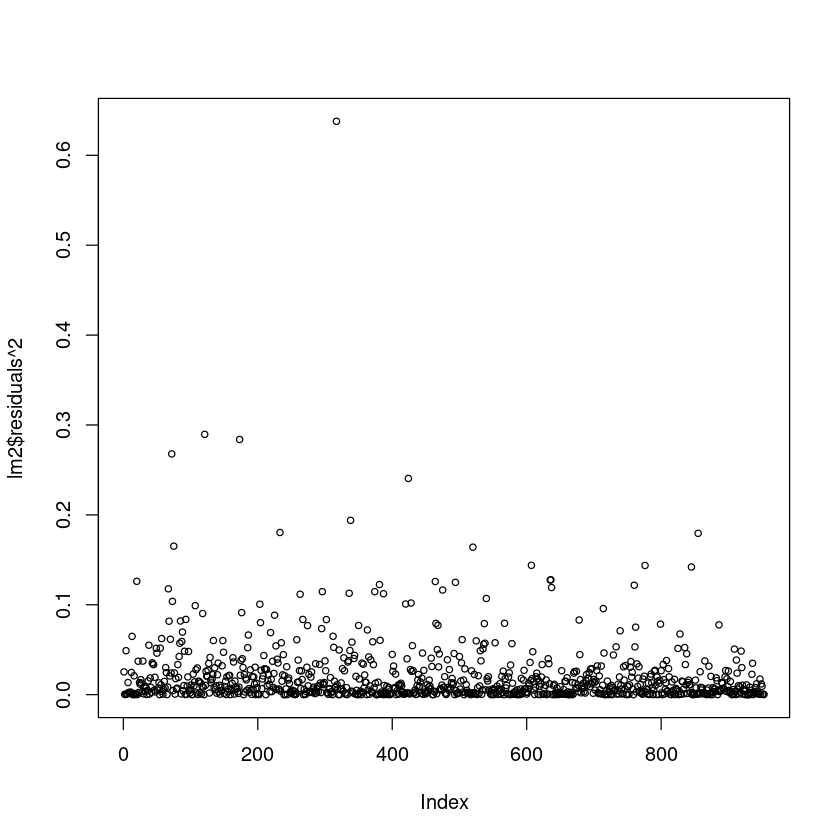

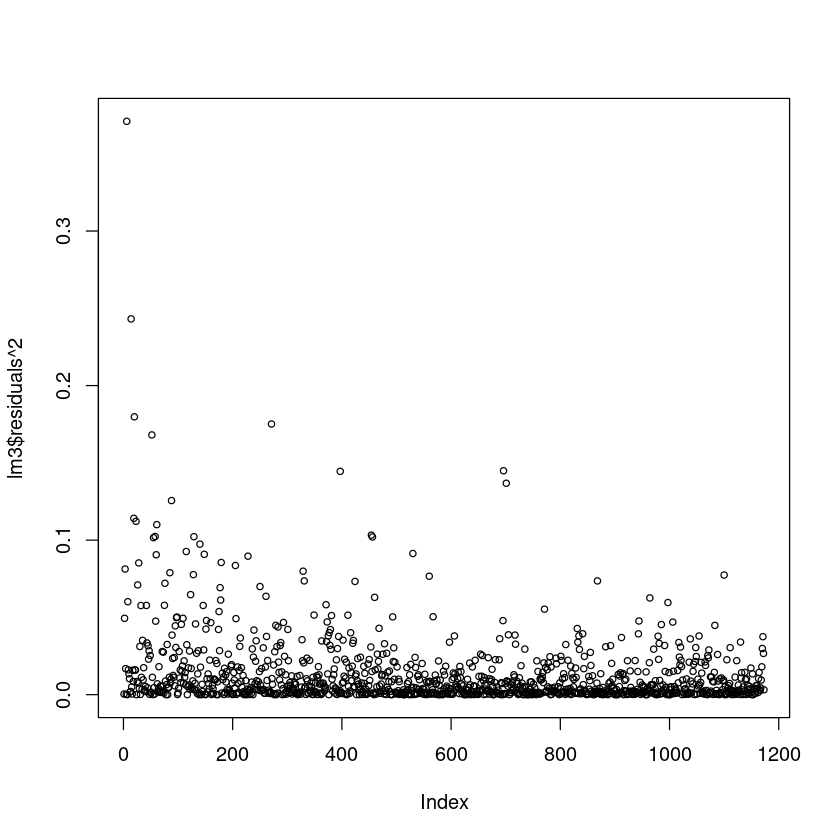

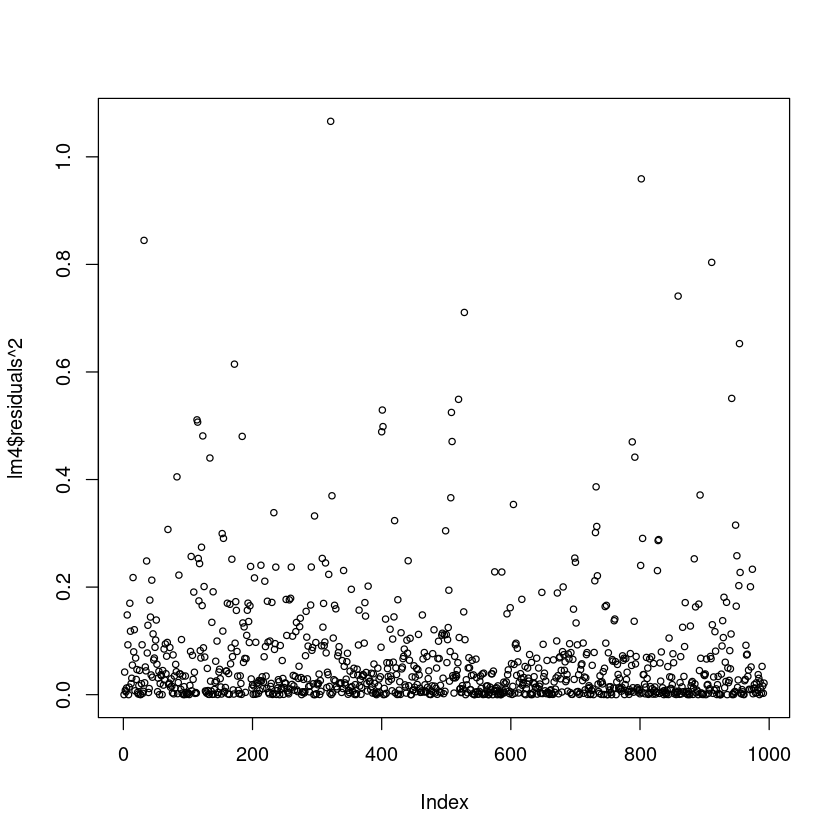

In [9]:
plot(lm2$residuals^2, cex = 0.7)
plot(lm3$residuals^2, cex = 0.7)
plot(lm4$residuals^2, cex = 0.7)

In [11]:
# df2

In [26]:
# res_reg2 <- lm(lm2$residuals ~ lag(lm2$residuals)  +  lead(lm2$residuals,1) +    Rooms+Totsp+Totsp2+Dist+Metrdist+Walk+Brick+Floors+NFloor+NFloor2+
#          floor1+floor2+ Height+ Height2+PegToCur+Demolish+ HouseAge + HouseAge2+ TotFlatNum+
#          RoomspMean+RoomspMean2 + KitspShare + AgeDiff + AgeDiff2+ FloorDiff, data = data.frame(lm2[[7]][[1]]))
# res_reg3 <- lm(lm3$residuals ~ lag(lm3$residuals)  +  lead(lm3$residuals,1) +    Rooms+Totsp+Totsp2+Dist+Metrdist+Walk+Brick+Floors+NFloor+NFloor2+
#          floor1+floor2+ Height+ Height2+PegToCur+Demolish+ HouseAge + HouseAge2+ TotFlatNum+
#          RoomspMean+RoomspMean2 + KitspShare + AgeDiff + AgeDiff2+ FloorDiff, data = data.frame(lm3[[7]][[1]]))
# res_reg4 <- lm(lm4$residuals ~ lag(lm4$residuals)  +  lead(lm4$residuals,1) +    Rooms+Totsp+Totsp2+Dist+Metrdist+Walk+Brick+Floors+NFloor+NFloor2+
#          floor1+floor2+ Height+ Height2+PegToCur+Demolish+ HouseAge + HouseAge2+ TotFlatNum+
#          RoomspMean+RoomspMean2 + KitspShare + AgeDiff + AgeDiff2+ FloorDiff, data = data.frame(lm4[[7]][[1]]))

In [28]:
# summary(res_reg2)
# summary(res_reg3)
# summary(res_reg4)

In [45]:
library(xtable)

In [63]:
xtable.coeftest <- function (x, caption = NULL, label = NULL, align =     NULL, digits = NULL, 
                         display = NULL, ...) 
{
  class(x) <- "matrix"
  li<-list(coef=x)
  return(xtable:::xtable.summary.lm(li, caption = caption, label = label, 
                                align = align, digits = digits, display = display))
}

In [71]:
library(Hmisc)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:xtable’:

    label, label<-

The following objects are masked from ‘package:dplyr’:

    src, summarize

The following objects are masked from ‘package:base’:

    format.pval, units



In [73]:
latex(c2, digits=5)

In [74]:
latex(c3, digits=5)

In [75]:
latex(c4, digits=5)

In [67]:
c2 = coeftest(lm2, vcov = vcovCL(lm2, cluster=df2$DistrictName, type="HC1"))
c3 = coeftest(lm3, vcov = vcovCL(lm3, cluster=df3$DistrictName, type="HC1"))
c4 = coeftest(lm4, vcov = vcovCL(lm4, cluster=df4$DistrictName, type="HC1"))

In [76]:
c2
c3
c4


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.4625e+01  1.1343e+00 12.8926 < 2.2e-16 ***
Rooms       -4.5696e-02  1.0796e-02 -4.2328 2.538e-05 ***
Totsp        2.3960e-02  1.4291e-03 16.7657 < 2.2e-16 ***
Totsp2      -5.9342e-05  6.3456e-06 -9.3516 < 2.2e-16 ***
Dist        -3.1298e-02  4.8669e-03 -6.4308 2.030e-10 ***
Metrdist    -2.4017e-03  1.4832e-03 -1.6193  0.105724    
Walk         7.6425e-02  2.5552e-02  2.9910  0.002855 ** 
Brick        7.7681e-02  1.6486e-02  4.7120 2.829e-06 ***
Floors       1.2816e-02  3.7586e-03  3.4098  0.000678 ***
NFloor       7.1118e-03  2.4786e-03  2.8692  0.004208 ** 
NFloor2     -2.4653e-04  8.8146e-05 -2.7968  0.005268 ** 
floor1      -7.8676e-02  1.7912e-02 -4.3924 1.251e-05 ***
floor2      -1.2492e-02  2.3483e-02 -0.5319  0.594898    
Height       4.7468e-01  7.8372e-01  0.6057  0.544882    
Height2     -5.9400e-02  1.3130e-01 -0.4524  0.651086    
PegToCur     1.7084e-01  1.2627e-01  1.3530  0


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.7196e+01  8.4824e-01 20.2723 < 2.2e-16 ***
Rooms       -7.9323e-03  2.6719e-02 -0.2969 0.7666121    
Totsp        2.3894e-02  1.7636e-03 13.5483 < 2.2e-16 ***
Totsp2      -6.9527e-05  8.1371e-06 -8.5445 < 2.2e-16 ***
Dist        -2.5761e-02  3.5265e-03 -7.3050 5.179e-13 ***
Metrdist    -5.1563e-03  1.0108e-03 -5.1013 3.945e-07 ***
Walk         1.0631e-01  2.1682e-02  4.9030 1.080e-06 ***
Brick        1.3223e-02  1.7745e-02  0.7452 0.4563328    
Floors       1.6132e-03  6.5927e-03  0.2447 0.8067380    
NFloor       7.3583e-03  1.9897e-03  3.6983 0.0002273 ***
NFloor2     -2.2356e-04  7.7541e-05 -2.8831 0.0040115 ** 
floor1      -5.5791e-02  1.2910e-02 -4.3217 1.683e-05 ***
floor2      -3.1789e-02  1.2443e-02 -2.5548 0.0107533 *  
Height      -1.5312e+00  6.4276e-01 -2.3822 0.0173739 *  
Height2      3.0030e-01  1.1402e-01  2.6336 0.0085610 ** 
PegToCur     1.7273e-01  7.1476e-02  2.4166 0.


t test of coefficients:

               Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)  1.3394e+01  1.0618e+00 12.6147 < 2.2e-16 ***
Rooms       -5.8433e-02  5.9759e-02 -0.9778 0.3284144    
Totsp        2.6162e-02  2.7198e-03  9.6192 < 2.2e-16 ***
Totsp2      -6.1318e-05  9.8146e-06 -6.2477 6.237e-10 ***
Dist        -1.4793e-01  3.4454e-02 -4.2935 1.936e-05 ***
Metrdist     1.7825e-03  3.3385e-03  0.5339 0.5935269    
Walk        -1.2239e-01  8.9529e-02 -1.3671 0.1719243    
Brick        1.0388e-01  1.9083e-02  5.4435 6.625e-08 ***
Floors       2.2881e-03  6.5991e-03  0.3467 0.7288673    
NFloor       3.0939e-03  3.1518e-03  0.9816 0.3265287    
NFloor2     -2.7175e-05  1.0257e-04 -0.2649 0.7911100    
floor1      -1.5052e-01  2.2067e-02 -6.8212 1.590e-11 ***
floor2      -5.8788e-02  2.0663e-02 -2.8451 0.0045339 ** 
Height       1.5396e+00  6.0239e-01  2.5557 0.0107491 *  
Height2     -2.0632e-01  9.6165e-02 -2.1454 0.0321665 *  
PegToCur     4.0121e-01  1.1226e-01  3.5738 0.

In [70]:
print(xtable(coeftest(lm2, vcov = vcovCL(lm2, cluster=df2$DistrictName, type="HC1"))))
print(xtable(c3))
print(xtable(c4))

% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Mon Jun  1 16:45:51 2020
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & 14.6247 & 1.1343 & 12.89 & 0.0000 \\ 
  Rooms & -0.0457 & 0.0108 & -4.23 & 0.0000 \\ 
  Totsp & 0.0240 & 0.0014 & 16.77 & 0.0000 \\ 
  Totsp2 & -0.0001 & 0.0000 & -9.35 & 0.0000 \\ 
  Dist & -0.0313 & 0.0049 & -6.43 & 0.0000 \\ 
  Metrdist & -0.0024 & 0.0015 & -1.62 & 0.1057 \\ 
  Walk & 0.0764 & 0.0256 & 2.99 & 0.0029 \\ 
  Brick & 0.0777 & 0.0165 & 4.71 & 0.0000 \\ 
  Floors & 0.0128 & 0.0038 & 3.41 & 0.0007 \\ 
  NFloor & 0.0071 & 0.0025 & 2.87 & 0.0042 \\ 
  NFloor2 & -0.0002 & 0.0001 & -2.80 & 0.0053 \\ 
  floor1 & -0.0787 & 0.0179 & -4.39 & 0.0000 \\ 
  floor2 & -0.0125 & 0.0235 & -0.53 & 0.5949 \\ 
  Height & 0.4747 & 0.7837 & 0.61 & 0.5449 \\ 
  Height2 & -0.0594 & 0.1313 & -0.45 & 0.6511 \\ 
  PegToCur & 0.1708 & 0.1263 & 1.35 & 0.1764 \\ 
  Demolish & 0.

In [55]:
# print(xtable(lm2))

% latex table generated in R 3.6.3 by xtable 1.8-4 package
% Mon Jun  1 16:33:15 2020
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Estimate & Std. Error & t value & Pr($>$$|$t$|$) \\ 
  \hline
(Intercept) & 14.6247 & 0.8209 & 17.82 & 0.0000 \\ 
  Rooms & -0.0457 & 0.0228 & -2.01 & 0.0450 \\ 
  Totsp & 0.0240 & 0.0018 & 12.97 & 0.0000 \\ 
  Totsp2 & -0.0001 & 0.0000 & -6.60 & 0.0000 \\ 
  Dist & -0.0313 & 0.0021 & -14.81 & 0.0000 \\ 
  Metrdist & -0.0024 & 0.0012 & -2.07 & 0.0384 \\ 
  Walk & 0.0764 & 0.0158 & 4.84 & 0.0000 \\ 
  Brick & 0.0777 & 0.0130 & 6.00 & 0.0000 \\ 
  Floors & 0.0128 & 0.0022 & 5.90 & 0.0000 \\ 
  NFloor & 0.0071 & 0.0024 & 2.96 & 0.0032 \\ 
  NFloor2 & -0.0002 & 0.0001 & -3.01 & 0.0027 \\ 
  floor1 & -0.0787 & 0.0197 & -3.99 & 0.0001 \\ 
  floor2 & -0.0125 & 0.0183 & -0.68 & 0.4955 \\ 
  Height & 0.4747 & 0.5726 & 0.83 & 0.4073 \\ 
  Height2 & -0.0594 & 0.0986 & -0.60 & 0.5472 \\ 
  PegToCur & 0.1708 & 0.0839 & 2.04 & 0.0419 \\ 
  Demolish & 0

In [43]:
JarqueBera.test(lm1$residuals)
JarqueBera.test(lm2$residuals)
JarqueBera.test(lm3$residuals)
JarqueBera.test(lm4$residuals)


	Jarque Bera Test

data:  lm1$residuals
X-squared = 1169.7, df = 2, p-value < 2.2e-16


	Skewness

data:  lm1$residuals
statistic = 0.64054, p-value < 2.2e-16


	Kurtosis

data:  lm1$residuals
statistic = 5.7134, p-value < 2.2e-16



	Jarque Bera Test

data:  lm2$residuals
X-squared = 160.92, df = 2, p-value < 2.2e-16


	Skewness

data:  lm2$residuals
statistic = 0.63835, p-value = 8.622e-16


	Kurtosis

data:  lm2$residuals
statistic = 4.5564, p-value < 2.2e-16



	Jarque Bera Test

data:  lm3$residuals
X-squared = 163.84, df = 2, p-value < 2.2e-16


	Skewness

data:  lm3$residuals
statistic = 0.55429, p-value = 9.176e-15


	Kurtosis

data:  lm3$residuals
statistic = 4.4571, p-value < 2.2e-16



	Jarque Bera Test

data:  lm4$residuals
X-squared = 75.626, df = 2, p-value < 2.2e-16


	Skewness

data:  lm4$residuals
statistic = 0.50568, p-value = 7.92e-11


	Kurtosis

data:  lm4$residuals
statistic = 3.8982, p-value = 7.704e-09
